<a href="https://colab.research.google.com/github/rushil2501/Flight-Price-Prediction/blob/main/Flight_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Libraries

In [ ]:
from sklearn import svm
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn import datasets
import numpy as np
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB  
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import numpy as np
from scipy.stats import multivariate_normal
import math
import collections
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import warnings
import seaborn as sns
from collections import Counter
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.ensemble import GradientBoostingClassifier
warnings.filterwarnings('ignore')
from tensorflow import keras
from tensorflow.keras.utils import plot_model
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
from sklearn.linear_model import Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn import linear_model
from prettytable import PrettyTable

## Preprocessing ,Visualization and Exploratory Data Analysis

In [ ]:
data = pd.read_excel('/content/drive/MyDrive/Dataset.xlsx')
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [ ]:
data.isnull().head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
data.isnull().sum()


Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [ ]:
data.dropna(inplace = True)
data[data.duplicated()].head()
data.drop_duplicates(keep='first',inplace=True)
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


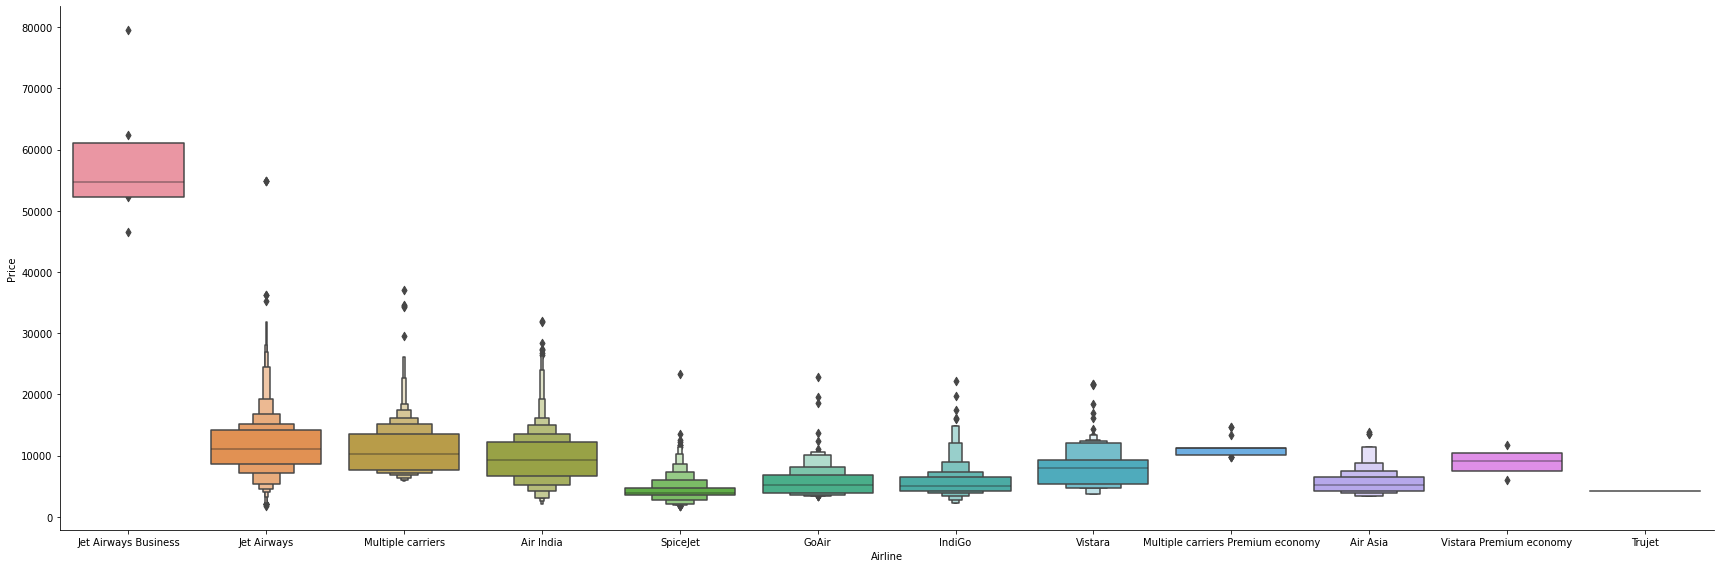

In [ ]:
sns.catplot(y = "Price", x = "Airline", data = data.sort_values("Price", ascending = False), kind="boxen", height = 8, aspect = 3)
plt.show()


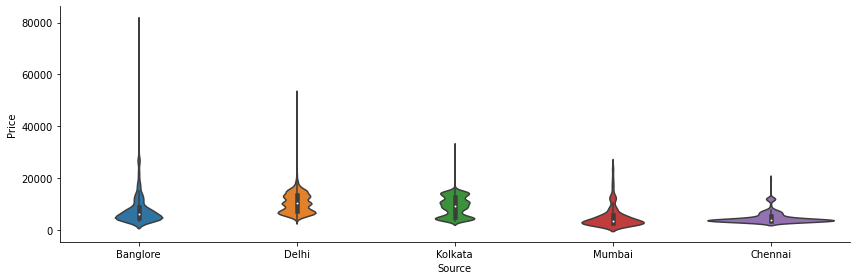

In [ ]:
sns.catplot(y = "Price", x = "Source", data = data.sort_values("Price", ascending = False), kind="violin", height = 4, aspect = 3)
plt.show()

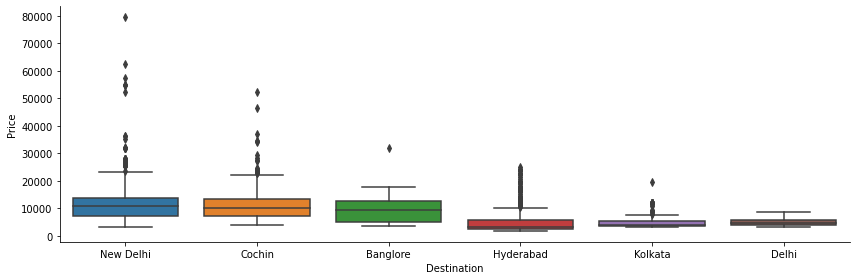

In [ ]:
sns.catplot(y = "Price", x = "Destination", data = data.sort_values("Price", ascending = False), kind="box", height = 4, aspect = 3)
plt.show()

In [ ]:
data['Duration'] = data['Duration'].str.replace("h", '*60').str.replace(' ','+').str.replace('m','*1').apply(eval)
data["Journey_day"] = data['Date_of_Journey'].str.split('/').str[0].astype(int)
data["Journey_month"] = data['Date_of_Journey'].str.split('/').str[1].astype(int)
data.drop(["Date_of_Journey"], axis = 1, inplace = True)

In [ ]:
data["Dep_hour"] = pd.to_datetime(data["Dep_Time"]).dt.hour
data["Dep_min"] = pd.to_datetime(data["Dep_Time"]).dt.minute
data.drop(["Dep_Time"], axis = 1, inplace = True)
data["Arrival_hour"] = pd.to_datetime(data.Arrival_Time).dt.hour
data["Arrival_min"] = pd.to_datetime(data.Arrival_Time).dt.minute
data.drop(["Arrival_Time"], axis = 1, inplace = True)


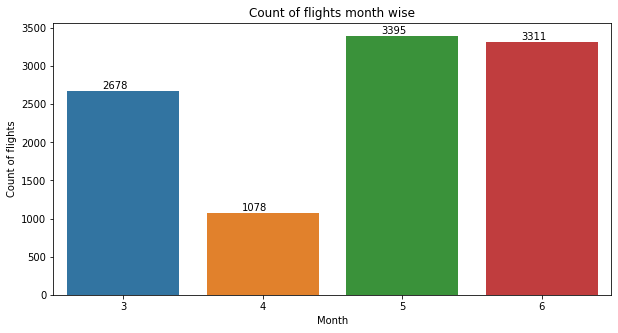

In [ ]:
plt.figure(figsize = (10, 5))
plt.title('Count of flights month wise')
ax=sns.countplot(x = 'Journey_month', data = data)
plt.xlabel('Month')
plt.ylabel('Count of flights')
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom', color= 'black')


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 <a list of 12 Text major ticklabel objects>)

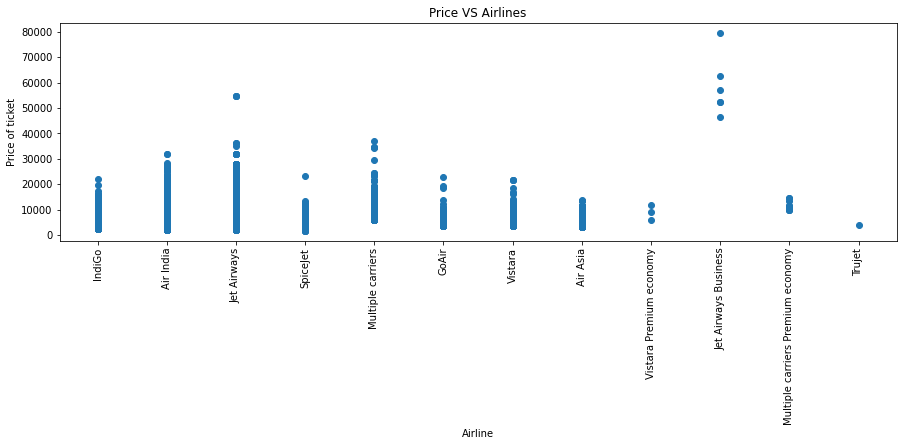

In [ ]:
plt.figure(figsize = (15,4))
plt.title('Price VS Airlines')
plt.scatter(data['Airline'], data['Price'])
plt.xticks
plt.xlabel('Airline')
plt.ylabel('Price of ticket')
plt.xticks(rotation = 90)

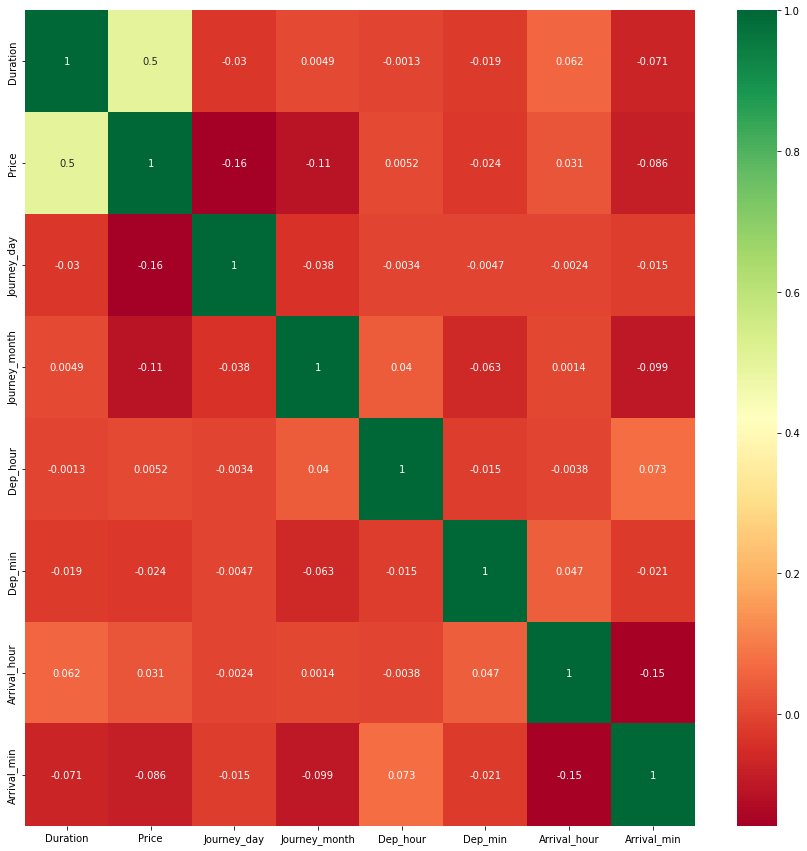

In [ ]:
plt.figure(figsize = (15,15))
sns.heatmap(data.corr(), annot = True, cmap = "RdYlGn")
plt.show()


In [ ]:
y = data['Price']
data = data.drop(["Price"], axis=1)

In [ ]:
train_categorical_data = data.select_dtypes(exclude=['int64', 'float','int32'])
train_numerical_data = data.select_dtypes(include=['int64', 'float','int32'])


In [ ]:
le = LabelEncoder()
train_categorical_data = train_categorical_data.apply(LabelEncoder().fit_transform)
train_categorical_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,3,0,5,18,4,8
1,1,3,0,84,1,8
2,4,2,1,118,1,8
3,3,3,0,91,0,8
4,3,0,5,29,0,8


In [ ]:
X = pd.concat([train_categorical_data, train_numerical_data], axis=1)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split( X, y)

## Ridge Regressor

In [ ]:
params = {'alpha' : [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]}
ridge_regressor = RandomizedSearchCV(Ridge(), params, cv = 5, scoring = 'neg_mean_absolute_error', n_jobs = -1)
ridge_regressor.fit(X_train, y_train)


RandomizedSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
                   param_distributions={'alpha': [0.0001, 0.001, 0.01, 0.1, 1,
                                                  10, 100, 1000, 10000,
                                                  100000]},
                   scoring='neg_mean_absolute_error')

In [ ]:
y_train_pred = ridge_regressor.predict(X_train)
y_test_pred = ridge_regressor.predict(X_test)

In [ ]:
print("Train Results for Ridge Regressor Model:")
print("Root Mean Squared Error: ", np.sqrt(metrics.mean_squared_error(y_train.values, y_train_pred)))
print("Mean Absolute % Error: ", round(metrics.mean_absolute_percentage_error(y_train.values, y_train_pred)))
print("R-Squared: ", metrics.r2_score(y_train.values, y_train_pred))

Train Results for Ridge Regressor Model:
Root Mean Squared Error:  3545.7792530178317
Mean Absolute % Error:  0
R-Squared:  0.4187169622693149


In [ ]:
print("Test Results for Ridge Regressor Model:")
print("Root Mean Squared Error: ", np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))
print("Mean Absolute Error: ", round(metrics.mean_absolute_error(y_test, y_test_pred)))
print("R-Squared: ", metrics.r2_score(y_test, y_test_pred))


Test Results for Ridge Regressor Model:
Root Mean Squared Error:  3480.0359437663737
Mean Absolute Error:  2498
R-Squared:  0.41323207939883844


## Lasso Regressor

In [ ]:
params = {'alpha' : [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]}
lasso_regressor = GridSearchCV(Lasso(), params ,cv = 15,scoring = 'neg_mean_absolute_error', n_jobs = -1)
lasso_regressor.fit(X_train, y_train)


GridSearchCV(cv=15, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                                   10000, 100000]},
             scoring='neg_mean_absolute_error')

In [ ]:
y_train_pred = lasso_regressor.predict(X_train)
y_test_pred = lasso_regressor.predict(X_test)
print("Train Results for Lasso Regressor Model:")
print("Root Mean Squared Error: ", np.sqrt(metrics.mean_squared_error(y_train.values, y_train_pred)))
print("Mean Absolute % Error: ", round(metrics.mean_absolute_percentage_error(y_train.values, y_train_pred)))
print("R-Squared: ", metrics.r2_score(y_train.values, y_train_pred))


Train Results for Lasso Regressor Model:
Root Mean Squared Error:  3548.294554091118
Mean Absolute % Error:  0
R-Squared:  0.41789196988460253


In [ ]:
print("Test Results for Lasso Regressor Model:")
print("Root Mean squared Error: ", np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))
print("Mean Absolute Error: ", round(metrics.mean_absolute_error(y_test, y_test_pred)))
print("R-Squared: ", metrics.r2_score(y_test, y_test_pred))

Test Results for Lasso Regressor Model:
Root Mean squared Error:  3480.907642725622
Mean Absolute Error:  2491
R-Squared:  0.412938088731046


## Decision Tree Regressor

In [ ]:
depth = list(range(3,30))
param_grid = dict(max_depth = depth)
tree = GridSearchCV(DecisionTreeRegressor(), param_grid, cv = 10)
tree.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                                       15, 16, 17, 18, 19, 20, 21, 22, 23, 24,
                                       25, 26, 27, 28, 29]})

In [ ]:
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)

In [ ]:
print("Train Results for Decision Tree Regressor Model:")
print("Root Mean squared Error: ", np.sqrt(metrics.mean_squared_error(y_train.values, y_train_pred)))
print("Mean Absolute % Error: ", round(metrics.mean_absolute_percentage_error(y_train.values, y_train_pred)))
print("R-Squared: ", metrics.r2_score(y_train.values, y_train_pred))

Train Results for Decision Tree Regressor Model:
Root Mean squared Error:  770.1309787038289
Mean Absolute % Error:  0
R-Squared:  0.9725783585666534


In [ ]:
print("Test Results for Decision Tree Regressor Model:")
print("Root Mean Squared Error: ", np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))
print("Mean Absolute Error: ", round(metrics.mean_absolute_error(y_test, y_test_pred)))
print("R-Squared: ", metrics.r2_score(y_test, y_test_pred))


Test Results for Decision Tree Regressor Model:
Root Mean Squared Error:  2208.9486499774807
Mean Absolute Error:  885
R-Squared:  0.7635876589452757


## Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]


In [ ]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rf = RandomizedSearchCV(RandomForestRegressor(), param_distributions = random_grid,cv=3,n_iter = 50,  verbose=2, random_state=42, n_jobs = -1)
rf.fit(X_train,y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [ ]:
rf.best_params_

{'bootstrap': False,
 'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 400}

In [ ]:
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

In [ ]:
print("Train Results for Decision Tree Regressor Model:")
print("Root Mean squared Error: ", np.sqrt(metrics.mean_squared_error(y_train.values, y_train_pred)))
print("Mean Absolute Error: ", round(metrics.mean_absolute_error(y_train.values, y_train_pred)))
print("R-Squared: ", metrics.r2_score(y_train.values, y_train_pred))

Train Results for Decision Tree Regressor Model:
Root Mean squared Error:  244.85667614843032
Mean Absolute Error:  29
R-Squared:  0.9972280323308454


In [ ]:
print("Test Results for random forest Regressor Model:")
print("Root Mean Squared Error: ", np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))
print("Mean Absolute Error: ", round(metrics.mean_absolute_error(y_test, y_test_pred)))
print("R-Squared: ", metrics.r2_score(y_test, y_test_pred))

Test Results for random forest Regressor Model:
Root Mean Squared Error:  1641.0232455077012
Mean Absolute Error:  758
R-Squared:  0.8695246804671839


## XGBoost

In [ ]:
import xgboost as xgb
model_xgb = xgb.XGBRegressor()
model_xgb.fit(X_train, y_train,verbose=True)
xgb_pred_train = model_xgb.predict(X_train)


[15:05:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
R-Squared train:  0.850107152435462
R-Squared test:  0.7831239055158843


In [ ]:
xgb_pred = model_xgb.predict(X_test)

print("Test Results for XGBoost Regressor Model:")
print("Root Mean Squared Error: ", np.sqrt(metrics.mean_squared_error(y_test, xgb_pred)))
print("Mean Absolute Error: ", round(metrics.mean_absolute_error(y_test, xgb_pred)))
print("R-Squared: ", metrics.r2_score(y_test, xgb_pred))

Test Results for XGBoost Regressor Model:
Root Mean Squared Error:  2115.7112255999405
Mean Absolute Error:  1282
R-Squared:  0.7831239055158843


## LightGBM

In [ ]:
import lightgbm

In [ ]:
lgbm_model=lightgbm.LGBMRegressor()
learning_rate=[0.005,0.01,0.05,0.1,0.15]
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 100)]
max_depth = [int(x) for x in np.linspace(5,15, num = 1)]
num_leaves=[int(x) for x in np.linspace(19,100, num = 5)]
random_grid = {'n_estimators': n_estimators,'max_depth': max_depth,'num_leaves':num_leaves,'learning_rate':learning_rate}

lgbm_random = RandomizedSearchCV(estimator = lgbm_model, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=0, n_jobs = -1)

lgbm_random.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=LGBMRegressor(), n_iter=100, n_jobs=-1,
                   param_distributions={'learning_rate': [0.005, 0.01, 0.05,
                                                          0.1, 0.15],
                                        'max_depth': [5],
                                        'n_estimators': [100, 119, 138, 157,
                                                         176, 195, 215, 234,
                                                         253, 272, 291, 311,
                                                         330, 349, 368, 387,
                                                         407, 426, 445, 464,
                                                         483, 503, 522, 541,
                                                         560, 579, 598, 618,
                                                         637, 656, ...],
                                        'num_leaves': [19, 39, 59, 79, 100]},
                   random_stat

In [ ]:
predicted_y_lgbm = lgbm_random.predict(X_test)
train_pred = lgbm_random.predict(X_train)
#print("R-Squared train: ", metrics.r2_score(y_train, train_pred))

# print("R-Squared test: ", metrics.r2_score(y_test, predicted_y_lgbm))
print("Test Results for LghtGBM Regressor Model:")
print("Root Mean Squared Error: ", np.sqrt(metrics.mean_squared_error(y_test, predicted_y_lgbm)))
print("Mean Absolute Error: ", round(metrics.mean_absolute_error(y_test, predicted_y_lgbm)))
print("R-Squared: ", metrics.r2_score(y_test, predicted_y_lgbm))

Test Results for LghtGBM Regressor Model:
Root Mean Squared Error:  1625.962950404697
Mean Absolute Error:  791
R-Squared:  0.8719085346377158


## Gradient Boosting Regressor

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
gb_model=GradientBoostingRegressor()
learning_rates = [1, 0.5, 0.25, 0.1, 0.05, 0.01]
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 100)]
max_depth = [int(x) for x in np.linspace(5,15, num = 1)]
subsample=[0.7,0.75,0.8,0.85,0.9,0.95,1]
random_grid = {'n_estimators': n_estimators,'max_depth': max_depth,'subsample':subsample,'learning_rate':learning_rates}
gb_random = RandomizedSearchCV(estimator = gb_model, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=0, n_jobs = -1)
gb_random.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=GradientBoostingRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'learning_rate': [1, 0.5, 0.25, 0.1,
                                                          0.05, 0.01],
                                        'max_depth': [5],
                                        'n_estimators': [100, 119, 138, 157,
                                                         176, 195, 215, 234,
                                                         253, 272, 291, 311,
                                                         330, 349, 368, 387,
                                                         407, 426, 445, 464,
                                                         483, 503, 522, 541,
                                                         560, 579, 598, 618,
                                                         637, 656, ...],
                                        'subsample': [0.7, 0.75, 0.8, 0.85, 

In [ ]:
predicted_y_gb = gb_random.predict(X_test)
train_pred = gb_random.predict(X_train)

print("Test Results for Gradient Boosting Regressor Model:")
print("Root Mean Squared Error: ", np.sqrt(metrics.mean_squared_error(y_test, predicted_y_gb)))
print("Mean Absolute Error: ", round(metrics.mean_absolute_error(y_test, predicted_y_gb)))
print("R-Squared: ", metrics.r2_score(y_test, predicted_y_gb))

Test Results for Gradient Boosting Regressor Model:
Root Mean Squared Error:  1546.6377524195536
Mean Absolute Error:  748
R-Squared:  0.884101953253798


##Evaluation and Visualisation of results given by the models used




In [ ]:
x = PrettyTable()
x.field_names = ["Model Name", "Root Mean squared error", "Mean Absolute Error", "R-Squared"]
x.add_row(['Ridge Regression','3480.035','2498','0.413'])
x.add_row(['Lasso Regression','3480.907','2491','0.41293'])
x.add_row(['Decision Tree Regressor','2208.94','885','0.7635'])
x.add_row(['Random Forest','1641.023','758','0.8695'])
x.add_row(['XGBoost','2115.711','1282','0.783'])
x.add_row(['LightGBM','1625.96','791','0.8719'])
x.add_row(['Gradient Boosting','1546.63','748','0.88410'])

print(x)

+-------------------------+-------------------------+---------------------+-----------+
|        Model Name       | Root Mean squared error | Mean Absolute Error | R-Squared |
+-------------------------+-------------------------+---------------------+-----------+
|     Ridge Regression    |         3480.035        |         2498        |   0.413   |
|     Lasso Regression    |         3480.907        |         2491        |  0.41293  |
| Decision Tree Regressor |         2208.94         |         885         |   0.7635  |
|      Random Forest      |         1641.023        |         758         |   0.8695  |
|         XGBoost         |         2115.711        |         1282        |   0.783   |
|         LightGBM        |         1625.96         |         791         |   0.8719  |
|    Gradient Boosting    |         1546.63         |         748         |  0.88410  |
+-------------------------+-------------------------+---------------------+-----------+


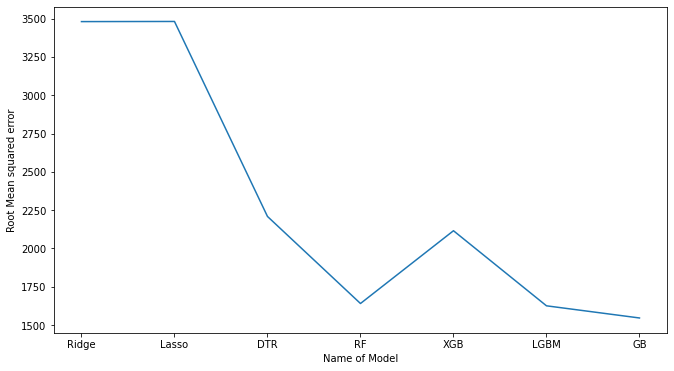

In [ ]:
rmse = [3480.035,3480.907,2208.94,1641.023,2115.711,1625.96,1546.63]
models = ['Ridge','Lasso','DTR','RF','XGB','LGBM','GB']
plt.plot(models,rmse)
plt.ylabel('Root Mean squared error')
plt.xlabel('Name of Model')

plt.show()

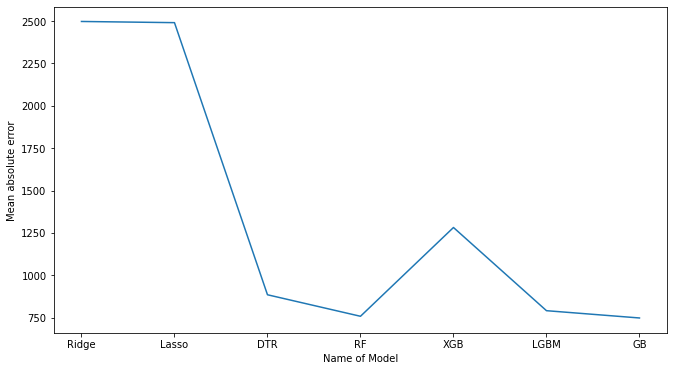

In [ ]:
mae = [2498,2491,885,758,1282,791,748]
plt.plot(models,mae)
plt.ylabel('Mean absolute error')
plt.xlabel('Name of Model')

plt.show()

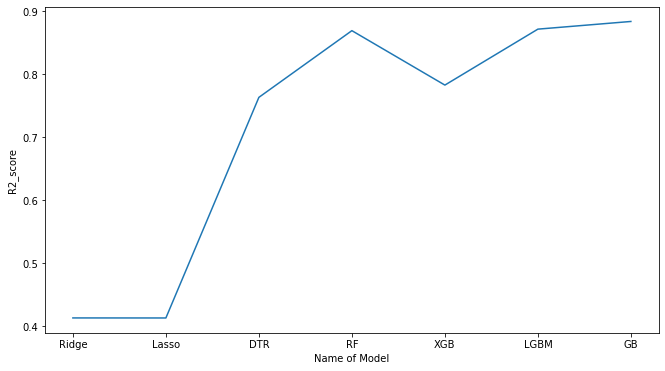

In [ ]:
r2 = [0.413,0.41293,0.7635,0.8695,0.783,0.8719,0.88410]
plt.plot(models,r2)
plt.ylabel('R2_score')
plt.xlabel('Name of Model')
plt.show()